1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante regresión logística, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]]
- ¿Qué acierto tiene tu modelo? (score)
- Utiliza un conjunto de test con el 40% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Virginica" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras la regresión logística un buen algoritmo para estos datos? ¿por qué?

## Loading Data

In [33]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb


In [34]:
df = pd.read_csv("../data/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [35]:
X = np.array(df.drop(["variety"], axis= 1))

In [36]:
# target 
y = np.array(df["variety"])

In [37]:
print("X:", X.shape)
print("y:", y.shape)

X: (150, 4)
y: (150,)


## Data Visualizing

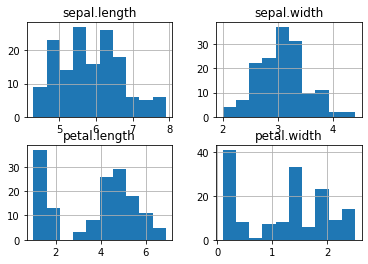

In [38]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

df.drop(['variety'], 1).hist()
plt.show()

C:\Program Files\Python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


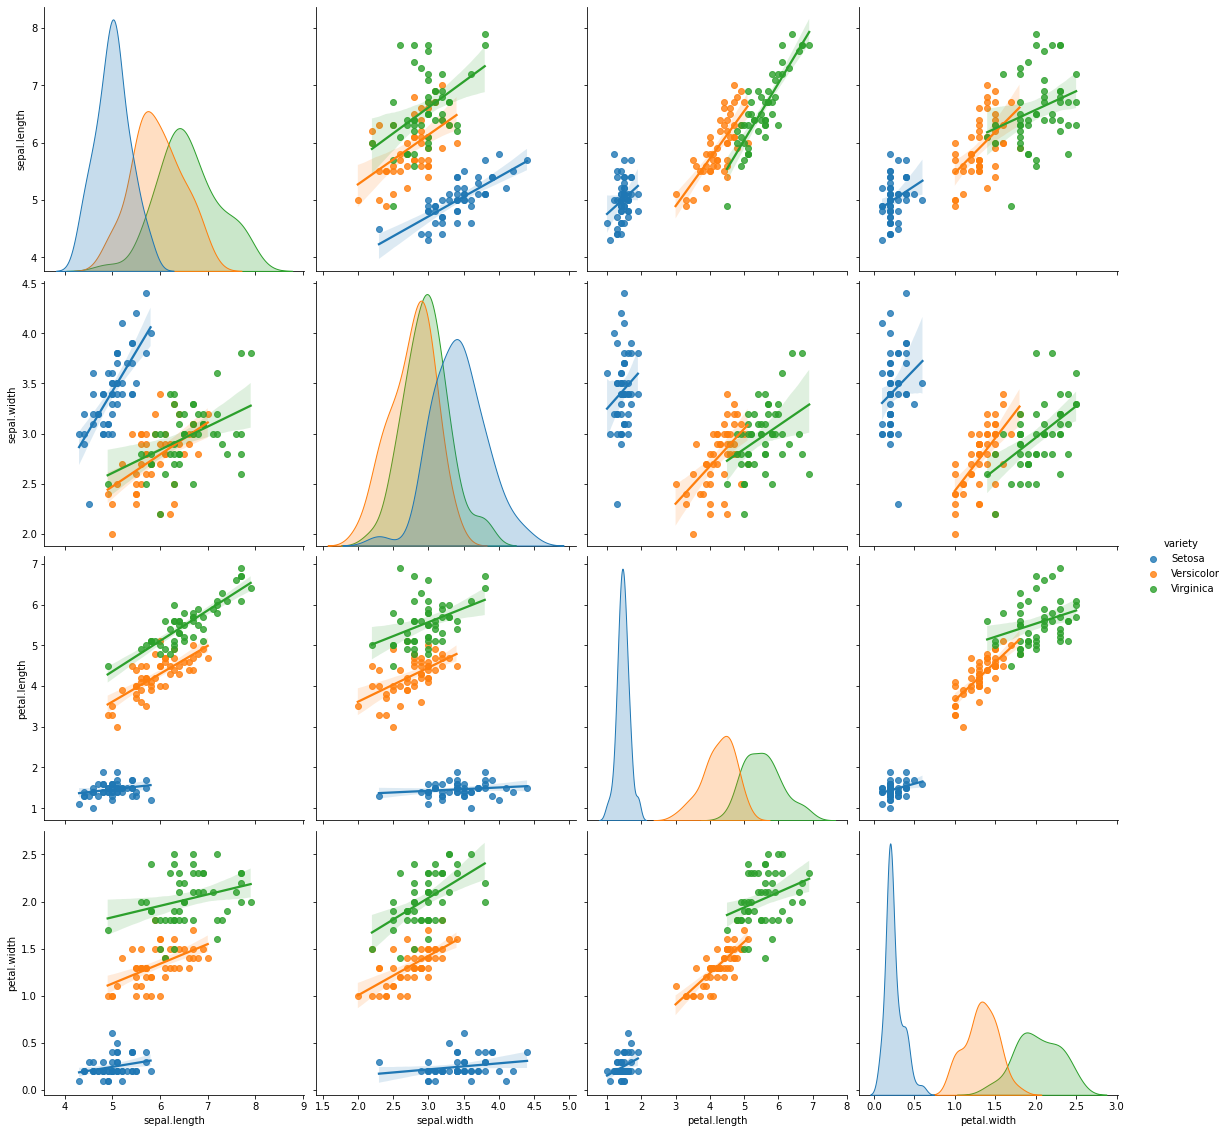

In [39]:
sb.pairplot(df.dropna(), hue='variety',size=4,vars=["sepal.length", "sepal.width","petal.length","petal.width"],kind='reg') # "reg" de regresión lineal

## Inicialize the parameters

In [40]:
#here is not training
model = linear_model.LogisticRegression(max_iter=1000)

model.fit(X,y)
model.score(X, y)

0.9733333333333334

### Training split, test size = 20%

In [41]:
from sklearn.model_selection import train_test_split

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2 ,random_state=42)
print('X_train_20:', X_train_20.shape)
print('X_test_20:', X_test_20.shape)
print('y_train_20:', y_train_20.shape)
print('y_test_20:', y_test_20.shape)

X_train_20: (120, 4)
X_test_20: (30, 4)
y_train_20: (120,)
y_test_20: (30,)


### Cross Validation

In [42]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
name='Logistic Regression, test size = 20%'
kfold = KFold(n_splits=10, random_state = 42, shuffle = True) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train_20, y_train_20, cv=kfold, scoring='accuracy',)
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)
print("")
print("----------")


[0.91666667 1.         1.         1.         0.83333333 1.
 0.83333333 0.91666667 1.         1.        ]
----------
Logistic Regression, test size = 20%: 0.950000 +- (0.066667)

----------


###  After the Cross Validation and with optimus results, we can try with all training set.

In [43]:
model.fit(X_train_20, y_train_20)

LogisticRegression(max_iter=1000)

### SCORES

In [44]:
model.score(X_train_20, y_train_20) #great results

0.975

In [45]:
model.score(X_test_20, y_test_20) # super great results!!!

1.0

## Predictions

In [47]:
model.predict([[15.7,2.8,9.5,0.1]])

array(['Virginica'], dtype=object)

In [49]:
model.predict([[1.7,3.8,4.5,11.3]])


array(['Virginica'], dtype=object)

### Training with all Data 

In [51]:

model.fit(X, y)
print("Data SCORES:")
print("")
print('Score full data:', model.score(X, y) * 100, '%')
print('Score X train:', model.score(X_train_20, y_train_20)* 100, '%')
print('Score X test:', model.score(X_test_20, y_test_20)* 100, '%')

Data SCORES:

Score full data: 97.33333333333334 %
Score X train: 96.66666666666667 %
Score X test: 100.0 %


* Our model with all full data still giving good results, but some less that training test

In [58]:
from sklearn.metrics import confusion_matrix
predic = model.predict(X_test_20)
print(confusion_matrix(y_test_20, predic))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### TRAINING WITH TEST SIZE = 40 %

In [61]:
from sklearn.model_selection import train_test_split

X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.4 ,random_state=42)
print('X_train_40:', X_train_40.shape)
print('X_test_40:', X_test_40.shape)
print('y_train_40:', y_train_40.shape)
print('y_test_40:', y_test_40.shape)

X_train_40: (90, 4)
X_test_40: (60, 4)
y_train_40: (90,)
y_test_40: (60,)


### Cross Validation test size = 40%

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
name='Logistic Regression, test size = 40%'
kfold = KFold(n_splits=10, random_state = 42, shuffle = True) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results_40 = cross_val_score(model, X_train_40, y_train_40, cv=kfold, scoring='accuracy',)
msg_40 = "%s: %f %s (%f)" % (name, cv_results_40.mean(), "+-", cv_results_40.std())
print(cv_results_40)
print("----------")
print(msg)
print("")
print("----------")

[1.         0.88888889 1.         1.         1.         0.77777778
 1.         0.88888889 0.88888889 0.88888889]
----------
Logistic Regression, test size = 20%: 0.950000 +- (0.066667)

----------


### SCORES AND TRAINING MY MODEL

In [63]:
model.fit(X_train_40, y_train_40)

LogisticRegression(max_iter=1000)

In [64]:
model.score(X_train_40, y_train_40)

0.9555555555555556

In [65]:
model.predict([[15.7,2.8,9.5,0.1]])

array(['Virginica'], dtype=object)

In [66]:
model.predict([[1.7,3.8,4.5,11.3]])

array(['Virginica'], dtype=object)

### Still predicting for test size = 40% "Virginica"

### TRAININIG WITH ALL DATA AND SHOWING SCORES

In [67]:
model.fit(X, y)
print("Data SCORES:")
print("")
print('Score full data:', model.score(X, y) * 100, '%')
print('Score X train:', model.score(X_train_40, y_train_40)* 100, '%')
print('Score X test:', model.score(X_test_40, y_test_40)* 100, '%')

Data SCORES:

Score full data: 97.33333333333334 %
Score X train: 95.55555555555556 %
Score X test: 100.0 %


## Conclusions:

#### The predictions continue well with test size = 40 % . So we can conclude that with the variation of the test set from 20 to 40, there has not been a change for our training set, such as the results show

## Removing "Virginica" class

In [68]:
new_df = df.drop(df[df['variety'] == 'Virginica'].index)
new_df    #removing virginica class

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [71]:
X_no_vir = np.array(new_df.drop(['variety'], axis= 1))
y_no_vir = np.array(new_df['variety'])
print('X_no_vir----> X removing virginica:', X_no_vir.shape)
print('y_no_vir----> y removing virginica:', y_no_vir.shape) #new target

X_no_vir----> X removing virginica: (100, 4)
y_no_vir----> y removing virginica: (100,)


### Inicialize the new parameters (No Virginica included)

In [73]:
model_vir = linear_model.LogisticRegression(max_iter=1000)

### Test size = 20%

In [74]:
X_no_vir_train_20, X_no_vir_test_20, y_no_vir_train_20, y_no_vir_test_20 = train_test_split(X_no_vir, y_no_vir, test_size=0.2, random_state= 42)
print('X_no_vir_train_20:', X_no_vir_train_20.shape)
print('X_no_vir_test_20:', X_no_vir_test_20.shape)
print('y_no_vir_train_20:', y_no_vir_train_20.shape)
print('y_no_vir_test_20:', y_no_vir_test_20.shape)


X_no_vir_train_20: (80, 4)
X_no_vir_test_20: (20, 4)
y_no_vir_train_20: (80,)
y_no_vir_test_20: (20,)


In [75]:
model_vir.fit(X_no_vir_train_20, y_no_vir_train_20)  #training my model

LogisticRegression(max_iter=1000)

In [78]:
model_vir.score(X_no_vir_train_20, y_no_vir_train_20) #100% great results!!

1.0

In [76]:
model_vir.predict([[15.7,2.8,9.5,0.1]]) #show Versicolor

array(['Versicolor'], dtype=object)

In [77]:
model_vir.predict([[1.7,3.8,4.5,11.3]]) # show Versicolor

array(['Versicolor'], dtype=object)

### TRAINING FULL DATA AND SHOWING THE SCORES

In [79]:
model_vir.fit(X_no_vir, y_no_vir)
print("Data SCORES:")
print("")
print('Score full data:', model.score(X, y) * 100, '%')
print('Score X train:', model_vir.score(X_no_vir_train_20, y_no_vir_train_20)* 100, '%')
print('Score X test:', model_vir.score(X_no_vir_test_20, y_no_vir_test_20)* 100, '%')

Data SCORES:

Score full data: 97.33333333333334 %
Score X train: 100.0 %
Score X test: 100.0 %


## Conclusions:

### 
The results without the virginica class have also been satisfactory, the model is well trained, we could say that my model has a very high probability of predicting reliable results since the data are well related.

### The Logistic Regression is good algorithm for this model 

